## Players Analytics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
match = pd.read_csv('matches.csv')

In [8]:
deliver = pd.read_csv('delivery.csv')

In [12]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1095 non-null   int64  
 1   id               1095 non-null   int64  
 2   season           1095 non-null   int64  
 3   city             1044 non-null   object 
 4   date             1095 non-null   object 
 5   match_type       1095 non-null   object 
 6   player_of_match  1090 non-null   object 
 7   venue            1095 non-null   object 
 8   team1            1095 non-null   object 
 9   team2            1095 non-null   object 
 10  toss_winner      1090 non-null   object 
 11  toss_decision    1095 non-null   object 
 12  winner           1090 non-null   object 
 13  result           1095 non-null   object 
 14  result_margin    1076 non-null   float64
 15  target_runs      1092 non-null   float64
 16  target_overs     1092 non-null   float64
 17  super_over    

In [14]:
deliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        260920 non-null  int64 
 1   match_id          260920 non-null  int64 
 2   inning            260920 non-null  int64 
 3   batting_team      260920 non-null  object
 4   bowling_team      260920 non-null  object
 5   over              260920 non-null  int64 
 6   ball              260920 non-null  int64 
 7   batter            260920 non-null  object
 8   bowler            260920 non-null  object
 9   non_striker       260920 non-null  object
 10  batsman_runs      260920 non-null  int64 
 11  extra_runs        260920 non-null  int64 
 12  total_runs        260920 non-null  int64 
 13  extras_type       14125 non-null   object
 14  is_wicket         260920 non-null  int64 
 15  player_dismissed  12950 non-null   object
 16  dismissal_kind    12950 non-null   obj

In [22]:
deliver = deliver.rename(columns={'match_id':'id'}).drop(columns='Unnamed: 0')

In [26]:
merged = pd.merge(deliver,match,on='id')

In [28]:
merged

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,bat,kkr,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,bat,kkr,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,kkr,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,bat,kkr,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [30]:
match

,Unnamed: 0,id,season,city,date,match_type,player_of_match,venue,team1,team2,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,rcb,kkr,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",pbks,csk,...,bat,csk,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,dc,rr,...,bat,dc,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,mi,rcb,...,bat,rcb,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,kkr,srh,...,bat,kkr,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",pbks,srh,...,bat,srh,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",srh,kkr,...,bat,kkr,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",rcb,rr,...,field,rr,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",srh,rr,...,field,srh,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [32]:
d = {}
d['Chennai Super Kings'] = "csk"
d['Delhi Capitals'] = "dc"
d['Delhi Daredevils'] = "dc"
d['Gujarat Lions'] = "gt"
d['Gujarat Titans'] = "gt"
d['Kings XI Punjab'] = "pbks"
d['Kolkata Knight Riders'] = "kkr"
d['Lucknow Super Giants'] = "lsg"
d['Mumbai Indians'] = "mi"
d['Pune Warriors'] = "rpsg"
d['Punjab Kings'] = "pbks"
d['Rajasthan Royals'] = "rr"
d['Rising Pune Supergiant'] = "rpsg"
d['Royal Challengers Bangalore'] = "rcb"
d['Royal Challengers Bengaluru'] = "rcb"
d['Sunrisers Hyderabad'] = "srh"
d['Deccan Chargers'] = "srh"
d['Kochi Tuskers Kerala'] = "ktk"
d['Rising Pune Supergiants'] = "rpsg"

In [34]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_kind    12950 non-null   object 
 16  fielder           93

In [40]:
merged['batting_team'] = merged['batting_team'].replace(d)

In [42]:
merged['bowling_team'] = merged['bowling_team'].replace(d)

In [44]:
merged

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,kkr,rcb,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,kkr,rcb,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,kkr,rcb,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,kkr,rcb,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,kkr,rcb,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,kkr,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,kkr,srh,9,5,SS Iyer,AK Markram,VR Iyer,1,...,bat,kkr,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260916,1426312,2,kkr,srh,9,6,VR Iyer,AK Markram,SS Iyer,1,...,bat,kkr,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260917,1426312,2,kkr,srh,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,kkr,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260918,1426312,2,kkr,srh,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,bat,kkr,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


### Season Wise Top Batsman [Highest Run Scorers]

In [55]:
merged['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

dict_keys([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [197]:
def getTopBatsman(visualize=True):
    seasons = merged.groupby('season')
    res = []
    for i in  seasons.groups.keys():
        s = []
        s.append(i)
        df_ = seasons.get_group(i).groupby('batter').aggregate({'batsman_runs':'sum'}).sort_values(by='batsman_runs').tail(1)
        s.append(df_.index[0])
        s.append(df_.values[0][0])
        res.append(s)

    ans =  pd.DataFrame(res,columns=['Seasons','Batsman','Runs'])
    if visualize:
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        
        
        ax[0].bar(ans['Seasons'], ans['Runs'], color='skyblue')
        ax[0].set_xlabel('Seasons')
        ax[0].set_ylabel('Runs')
        ax[0].set_title('Top Batsman Performance per Season')

        for batsman in ans['Batsman']:
            subset = ans[ans['Batsman']==batsman]
            ax[0].bar(subset['Seasons'],subset['Runs'],label=batsman)
            
        ax[0].set_xlabel('Season')
        ax[0].set_ylabel('Runs')
        ax[0].legend(title='Batsman')
        ax[0].set_title('Top Batsman Runs')
        ax[0].tick_params(rotation=45)
        

        
        for season in ans['Seasons']:
            subset = ans[ans['Seasons'] == season]
            ax[1].bar(subset['Batsman'], subset['Runs'], label=season)

        ax[1].set_xlabel('Batsman')
        ax[1].set_ylabel('Runs')
        ax[1].set_title('Top Batsman Runs')
        ax[1].legend(title='Season')
        ax[1].tick_params(rotation=45)

        plt.tight_layout()
        plt.show()
    else :
        return ans
    

In [199]:
getTopBatsman(False)

,Seasons,Batsman,Runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


##  Players Performance analysis

In [225]:
def AnalyzePlayer(name):
    
    batting_performance = merged[merged['batter']==name]
    bowling_performance = merged[merged['bowler']==name]
    seasons_performance = None
    if(batting_performance.shape[0]):
        seasons_performance = batting_performance.groupby('season')
    batstats = []
    bowlstats = []
    if(seasons_performance is not None):
        for i in seasons_performance.groups.keys():
            temp = []
            temp.append(i)
            temp.append(seasons_performance.get_group(i).aggregate({'batsman_runs':'sum'}).values[0])
            batstats.append(temp)
        df1 = pd.DataFrame(batstats,columns=['Season','Runs'])
        return df1
    print("None")
    return None

In [229]:
vk = AnalyzePlayer('V Kohli')

Text(0.5, 1.0, 'Virat Kohli Performance over the years')

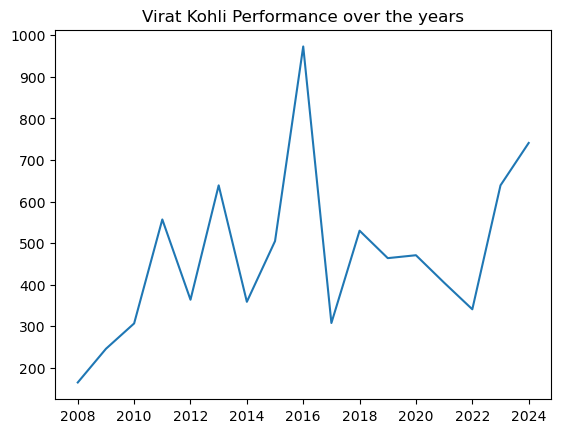

In [239]:
plt.plot(vk.Season,vk.Runs)
plt.title('Virat Kohli Performance over the years')

In [241]:
rs = AnalyzePlayer('RG Sharma') 

In [243]:
rs

,Season,Runs
0,2008,404
1,2009,362
2,2010,404
3,2011,372
4,2012,433
5,2013,538
6,2014,390
7,2015,482
8,2016,489
9,2017,333


Text(0.5, 1.0, 'Rohit Sharma Performance over the years')

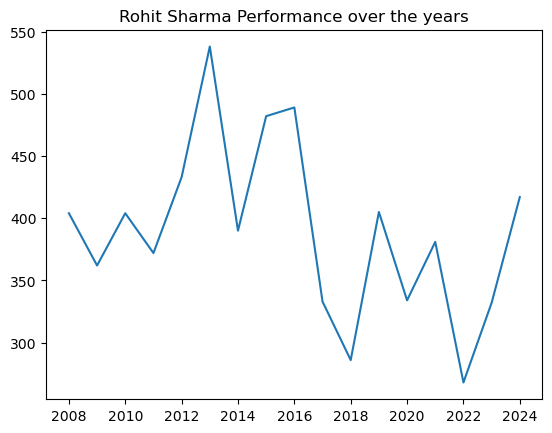

In [247]:
plt.plot(rs.Season,rs.Runs)
plt.title('Rohit Sharma Performance over the years')